# **Machine Learning Example using Tensorflow**

**What is Tensorflow?**

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

In [2]:
import tensorflow as tf

We are going to make a model using tensorflow to find value of y based on value of x using the equation y = 3x-2. A model is made of a neurons which combine to form neural networks.

In [3]:
def equation(x):
  y = (3*x) - 2
  return y

In [4]:
print(equation(10))

28


# **Data creation for training the model**

For using tensorflow we are going to need 2 array, i.e one will be input one will be output to train the Tensorflow model. We are going to use the numpy library for arrays.

In [5]:
import numpy as np

The more amount of data the better the model. We are going to use an array of length 10 for training. Let the arrays be x and y for input and output respectively.

In [6]:
x = []
y = []

Insert Value into the list using the for loop for 10 entries:

In [7]:
for z in range(0,10):
  c = equation(z)
  x.append(z)
  y.append(c)  

# **Checking the data**

Printing the list of data we got from the for loop

In [8]:
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[-2, 1, 4, 7, 10, 13, 16, 19, 22, 25]


Converting the list to numpy array aka array.

In [9]:
x = np.array(x)
y = np.array(y)

Printing the numpy array

In [10]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[-2  1  4  7 10 13 16 19 22 25]


# **Creating and training the model**

As the dimension of the input array i.e x is 1. And we need one output we are going to use the dense layer of the sequential model.

**Importing the required layers and models of tensorflow.**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**Defining the model**

In [12]:
def my_model():
  model = Sequential()
  model.add(Dense(units=1,input_shape=[1]))
  return model

model = my_model()

Printing the model summary

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


Defining the **Optimiser** and **loss** functions. **Loss** and **Optimiser** functions help in rectifing the errors during training. Also printing the accuracy metrices and storing it to a variable.

In [14]:
hist = model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

Training the model by running it through that data for 500 times. Which is given by epochs.

In [15]:
hist = model.fit(x,y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 517ms/step - loss: 172.2823 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 31.1029 - accuracy: 0.1000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 6.6973 - accuracy: 0.1000
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 2.4660 - accuracy: 0.1000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 1.7202 - accuracy: 0.1000
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 1.5768 - accuracy: 0.1000
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 1.5376 - accuracy: 0.1000
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 1.5166 - accuracy: 0.1000
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 1.4989 - accuracy: 0.1000
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 1.4819 - accuracy: 0.1000
Epoch 11/500
1/1 [==

**Now we have a trained model with an accuracy of 10% loss of 0.5% .** 

Defining a function to calculate data based on this model

In [16]:
def model_equation(d):
  o = model.predict([int(d)])
  return o

Creating a function to view the data of actual equation and the model predicted data

In [17]:
def compare_data_V1(u):
  equation_data = equation(u)
  model_data = model_equation(u)[0][0]
  difference = equation_data - model_data
  print(f"Equation value(Ground Thruth): {equation_data} \n Model Data(Predicted): {model_data} \n Difference between ground truth and predicted data: {difference}")


def compare_data(u):
  equation_data = equation(u)
  model_data = model_equation(u)[0][0]
  difference = equation_data - model_data
  return difference

Checking the model prediction, ground thruth and difference, **run the block below to play around.**

In [18]:
inpuut = input("Enter number: ")
z_difference = compare_data_V1(int(inpuut))

Enter number: 15
Equation value(Ground Thruth): 43 
 Model Data(Predicted): 42.804744720458984 
 Difference between ground truth and predicted data: 0.19525527954101562


# **Plotting data for difference and model prediction vs actual data**

Importing the pyplot library

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

# **Plotting difference**

Text(0, 0.5, 'Difference')

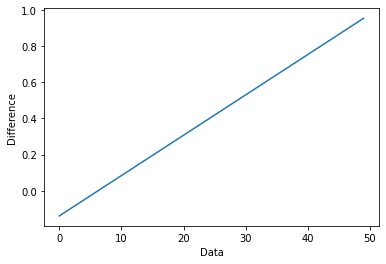

In [20]:
differennce = []
x_axis = []
for data in range(0,50):
  diff = compare_data(data)
  x_axis.append(data)
  differennce.append(diff)

plt.plot(x_axis,differennce)
plt.xlabel('Data')
plt.ylabel('Difference')

**Plotting Model prediction and Ground thruth**


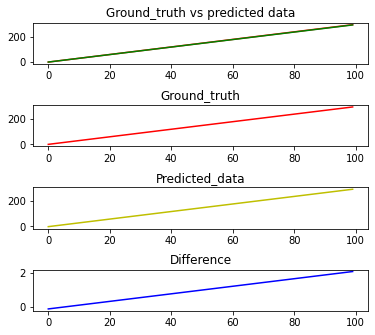

In [24]:
ground_thruth = []
model_prediction = []
x_axis = []
differennce = []

for data in range(0,100):
  g_thruth = equation(data)
  m_predict = model_equation(data)[0][0]
  diff = compare_data(data)
  ground_thruth.append(g_thruth)
  model_prediction.append(m_predict)
  differennce.append(diff)
  x_axis.append(data)
  



fig, plot = plt.subplots(4)

plot[0].plot(x_axis,ground_thruth, color = 'r')
plot[0].plot(x_axis, model_prediction, color = 'g')
plot[0].set_title("Ground_truth vs predicted data")

plot[1].plot(x_axis,ground_thruth, color = 'r')
plot[1].set_title("Ground_truth")

plot[2].plot(x_axis, model_prediction, color = 'y')
plot[2].set_title("Predicted_data")

plot[3].plot(x_axis, differennce, color = 'b')
plot[3].set_title("Difference")

plt.subplots_adjust(bottom=1, wspace=1, hspace=1, top=2)

This was kind of "Hello World" in machine learining.

Machine learing is a very powerful tool and can be used in solving many problems.

A type of neural network known as Convolutional Neural Networks(CNN) is used for image prediction. It is used in OCR recogninsing cars and road symbols.
This type of CNN is commonly used in self driving cars which uses camera. 

**Thanks for reading**.

**Made By Bikram Ghuku**